<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/test6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import warnings
import missingno as mn
import math
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler as scaler
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ipynb/datasets/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

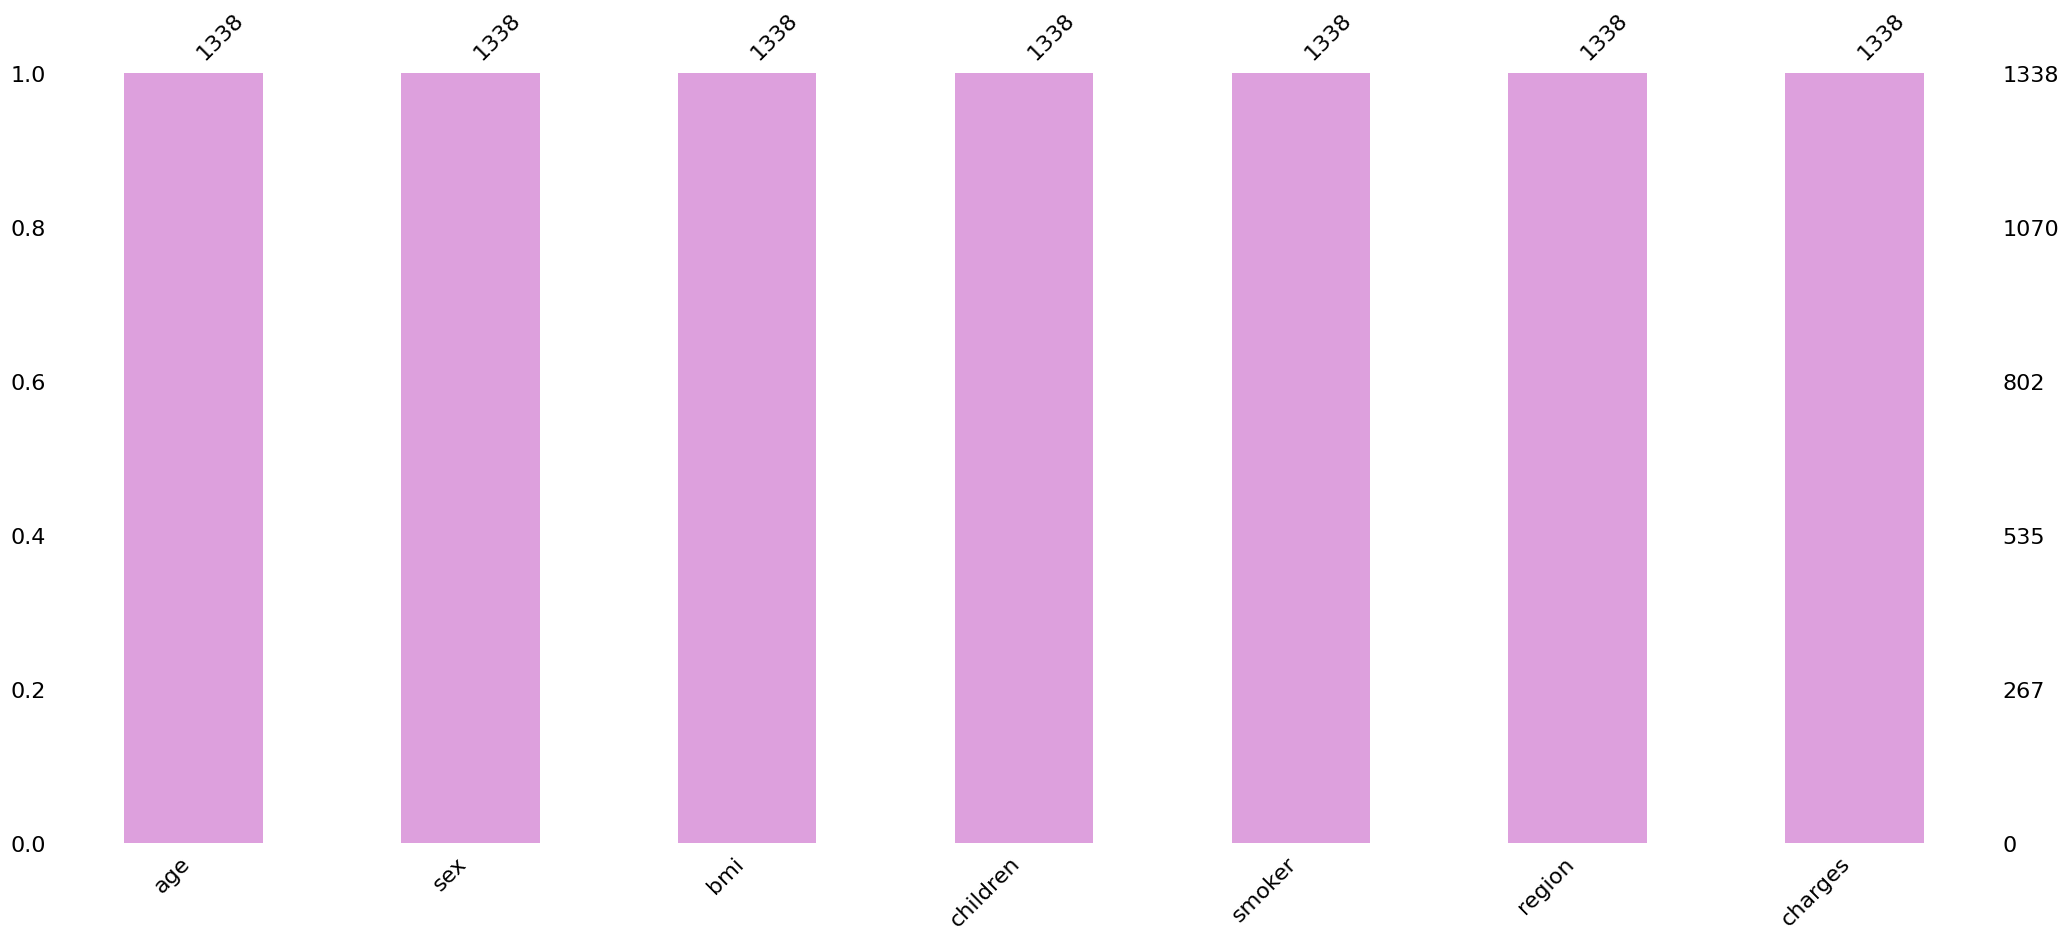

In [9]:
mn.bar(df, color='plum');

In [10]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [14]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

In [15]:
df = pd.get_dummies(df, columns=['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [25]:
scaler = scaler()
df[['age', 'bmi', 'charges']] = scaler.fit_transform(df[['age', 'bmi', 'charges']])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.321227,0,1,0.251611,0,0,0,1
1,0.000000,1,0.479150,1,0,0.009636,0,0,1,0
2,0.217391,1,0.458434,3,0,0.053115,0,0,1,0
3,0.326087,1,0.181464,0,0,0.333010,0,1,0,0
4,0.304348,1,0.347592,0,0,0.043816,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1,0.403820,3,0,0.151299,0,1,0,0
1334,0.000000,0,0.429379,0,0,0.017305,1,0,0,0
1335,0.000000,0,0.562012,0,0,0.008108,0,0,1,0
1336,0.065217,0,0.264730,0,0,0.014144,0,0,0,1


In [26]:
x = df.loc[:,df.columns!='charges']
y = df.loc[:,df.columns=='charges']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [28]:
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [74]:
y_pred = lr.predict(x_test)
y_pred[:6]

array([[ 0.53699115],
       [ 0.07150854],
       [-0.02053677],
       [ 0.09672322],
       [ 0.5419346 ],
       [ 0.17612931]])

In [35]:
mae = mae(y_test, y_pred)
mae

0.0669226378704273

In [31]:
lr.score(x_test, y_test)

0.7649261418865492

In [43]:
mser = mse(y_test, y_pred)
mser

0.009557676950353774

In [44]:
math.sqrt(mser)

0.09776337223292665

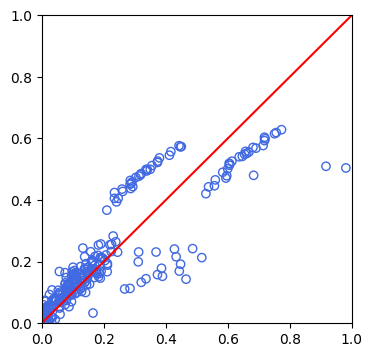

In [92]:
pt.figure(figsize=(4,4))
pt.scatter(y_test, y_pred, color='royalblue',marker='o', facecolors='none')
pt.xlim(0,1)
pt.ylim(0,1)
pt.axline([0,0],[1,1],color='red');

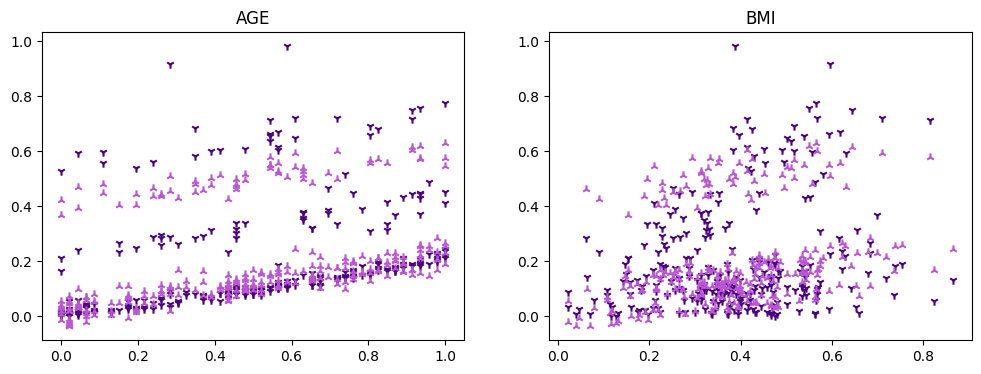

In [67]:
fig, ax = pt.subplots(1,2, figsize=(12,4))
ax[0].scatter(x_test['age'], y_test, color='indigo', marker='1');
ax[0].scatter(x_test['age'], y_pred, color='mediumorchid', marker='2')
ax[0].set(title='AGE')
ax[1].scatter(x_test['bmi'], y_test, color='indigo', marker='1')
ax[1].scatter(x_test['bmi'], y_pred, color='mediumorchid', marker='2')
ax[1].set(title='BMI');